<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelagem-de-um-motor-PMDC" data-toc-modified-id="Modelagem-de-um-motor-PMDC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelagem de um motor PMDC</a></span><ul class="toc-item"><li><span><a href="#Levantamento-do-sistema-de-equações-de-primeira-ordem-do-sistema" data-toc-modified-id="Levantamento-do-sistema-de-equações-de-primeira-ordem-do-sistema-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Levantamento do sistema de equações de primeira ordem do sistema</a></span><ul class="toc-item"><li><span><a href="#Referências:" data-toc-modified-id="Referências:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Referências:</a></span></li></ul></li><li><span><a href="#Definição-das-equações-no-espaço-de-estados-do-motor-genérico" data-toc-modified-id="Definição-das-equações-no-espaço-de-estados-do-motor-genérico-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Definição das equações no espaço de estados do motor genérico</a></span></li><li><span><a href="#Definindo-parâmetros" data-toc-modified-id="Definindo-parâmetros-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Definindo parâmetros</a></span></li><li><span><a href="#Simulando-o-motor-para-gerar-a-curva-de-performance" data-toc-modified-id="Simulando-o-motor-para-gerar-a-curva-de-performance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Simulando o motor para gerar a curva de performance</a></span></li><li><span><a href="#Gerando-gráfico-de-performance" data-toc-modified-id="Gerando-gráfico-de-performance-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Gerando gráfico de performance</a></span></li></ul></li><li><span><a href="#Obtendo-os-dados-do-fabricante" data-toc-modified-id="Obtendo-os-dados-do-fabricante-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtendo os dados do fabricante</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Modelagem de um motor PMDC

## Levantamento do sistema de equações de primeira ordem do sistema

### Referências:
- ref 1: http://research.iaun.ac.ir/pd/shahgholianold/pdfs/PaperC_9709.pdf
- ref 2: [PMDC Motor Modeling and Parameter Identification for Control Purpose](https://www.researchgate.net/publication/325946951_PMDC_Motor_Modeling_and_Parameter_Identification_for_Control_Purpose)

Um motor de corrente contínua ímã permanente pode ser modelado conforme o diagrama da Figura 1, onde:
- $V_A$ é a tensão elétrica de armadura, que é aplicada sob os terminais do motor, dada em Volts.
- $i_A$ é a corrente elétrica de armadura, que circula pelas espiras do enrolamento do motor, dada em Amperes.
- $R_A$ é a resistência de armadura, representando as perdas nas espiras e escovas do motor, dada em Ohms.
- $L_A$ é a indutância de armadura, representando a indutância das espiras do enrolamento do motor, dada em Henrys.
- $V_{BEMF}$ é a tensão contra-eletromotriz, gerada pela reação do campo magnético do enrolamento do rotor em interação com o campo magnético do estator (ímãs permanentes na carcaça), dada em Volts.


Da parte mecânica do diagrama, tem-se:
- $T_M$ é o torque eletromecânico, representando o torque diretamente no eixo do motor, dado em Nm.
- $T_L$ é o torque da carga, dado em Nm.
- $J_M$ é o momento de inércia do motor (com carga, considerado constante), dado em Kgm².
- $B_M$ é o coeficiente de fricção viscuoso, reprentando as perdas mecânicas, dado em Nms/rad
- $omega_M$ é a velocidade de rotação do eixo, dada em rad/s.
- $theta_M$ é a posição do eixo, dada em rad.


Para relacionar a parte elétrica e a mecânica têm-se duas constantes equivalentes entre si, úteis para simplificar uma série de detalhes construtivos do motor como número de espiras, número de polos, fluxo por polo, etc:
- $K_T$ é a relação torque-ampere do motor, dada em Nm/A.
- $K_V$ é a relação volt-rotação do motor, dada em Vs/rad.


Resolvendo o circuito temos:
$$
\begin{aligned}
& V_A(t) = R_A\,i_A(t) + L_A \frac{d}{dt}i_A(t) +V_{BEMF}(t) \\
& V_{BEMF}(t) = K_V\,\omega_M(t)
\end{aligned}
$$


Aplicando a segunda lei de Newton temos:
$$
\begin{aligned}
& T_M(t) = J_M \frac{d}{dt}\omega_M(t) + B\omega_M(t) + T_L(t) \\
& T_L(t) = K_T\,i_A(t) \\
& \omega_M(t) = \frac{d}{dt}\theta_M(t)
\end{aligned}
$$

Podemos rearranjar as equações para termos um sistema de equações de primeira ordem no formato utilizado para trabalhar com espaço de estados:

$$
\begin{align}
& \frac{d}{d t} \operatorname{i_{A}}{\left(t \right)} = - \frac{K_{T} \omega_{M}{\left(t \right)}}{L_{A}} - \frac{R_{A} \operatorname{i_{A}}{\left(t \right)}}{L_{A}} + \frac{\operatorname{V_{A}}{\left(t \right)}}{L_{A}} \\
& \frac{d}{d t} \omega_{M}{\left(t \right)} = - \frac{B_{M} \omega_{M}{\left(t \right)}}{J_{M}} + \frac{K_{T} \operatorname{i_{A}}{\left(t \right)}}{J_{M}} - \frac{\operatorname{T_{L}}{\left(t \right)}}{J_{M}} \\
& \frac{d}{d t} \theta_{M}{\left(t \right)} = \omega_{M}{\left(t \right)}
\end{align}
$$

Em Python podemos utilizar a biblioteca Sympy para escrever tais equações:

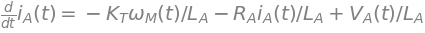

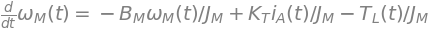

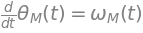

\frac{d}{d t} \operatorname{i_{A}}{\left(t \right)} = - \frac{K_{T} \omega_{M}{\left(t \right)}}{L_{A}} - \frac{R_{A} \operatorname{i_{A}}{\left(t \right)}}{L_{A}} + \frac{\operatorname{V_{A}}{\left(t \right)}}{L_{A}}
\frac{d}{d t} \omega_{M}{\left(t \right)} = - \frac{B_{M} \omega_{M}{\left(t \right)}}{J_{M}} + \frac{K_{T} \operatorname{i_{A}}{\left(t \right)}}{J_{M}} - \frac{\operatorname{T_{L}}{\left(t \right)}}{J_{M}}
\frac{d}{d t} \theta_{M}{\left(t \right)} = \omega_{M}{\left(t \right)}


In [23]:
import sympy as sym
  
d = sym.Derivative
f = sym.Function
t, s = sym.symbols('t s', constant=False)

# Functions
i_A = f('i_A')(t)
V_A = f('V_A')(t)
omega_M = f('omega_M')(t)
theta_M = f('theta_M')(t)
T_L = f('T_L')(t)

# Constants
R_A, L_A, K_T, K_V, J_M, B_M = sym.symbols('R_A L_A K_T K_V J_M B_M', real=True, constant=True, positive=True)

# Equations
eq1 = sym.Eq(d(i_A, t), -(R_A / L_A)*i_A -(K_T / L_A)*omega_M +(1 / L_A)*V_A)
eq2 = sym.Eq(d(omega_M, t), (K_T / J_M)*i_A -(B_M / J_M)*omega_M -(1 / J_M)*T_L )
eq3 = sym.Eq(d(theta_M, t), omega_M)

display(eq1, eq2, eq3)

sym.init_printing()  # we can use print(latex(...)) to get latex code
print(sym.latex(eq1))
print(sym.latex(eq2))
print(sym.latex(eq3))

## Definição das equações no espaço de estados do motor genérico
- Sobre Controle e Espaço de Estados em Python:
  - ref 3: https://dynamics-and-control.readthedocs.io
  - ref 4: https://en.wikibooks.org/wiki/Control_Systems

O formato padrão de espaço de estados pode ser descrito abaixo, sendo:
- $X$ os estados do sistema, de formato $n \times 1$
- $U$ as entradas do sistema, de formato $m \times 1$
- $Y$ as saídas do sistema, de formato $p \times 1$
- $A$ a matriz de transição de estados, de formato $n \times n$
- $B$ a matriz de entradas, de formato $n \times m$
- $C$ a matriz de saída, de formato $p \times n$
- $D$ a matriz do resto, de formato $p \times m$

$$
\begin{align}
& \frac{d}{d t} X{\left(t \right)} = A X{\left(t \right)} + B U{\left(t \right)} \\
& Y{\left(t \right)} = C X{\left(t \right)} + D U{\left(t \right)}
\end{align}
$$


Podemos novamente utilizar a biblioteca Sympy para escrever tais equações:

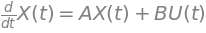

\frac{d}{d t} X{\left(t \right)} = A X{\left(t \right)} + B U{\left(t \right)}
Y{\left(t \right)} = C X{\left(t \right)} + D U{\left(t \right)}


In [24]:
# Space state dummy functions
X = f('X')(t)  # states
Y = f('Y')(t)  # output
U = f('U')(t)  # inputs

# Space states dummy matrix variables
A, B, C, D = sym.symbols('A B C D')

# Dummy standard space states equations
eq_ss1 = sym.Eq(d(X, t), A * X + B * U)
eq_ss2 = sym.Eq(Y, C * X + D * U)

display(eq_ss1, eq_ss2)
print(sym.latex(eq_ss1))
print(sym.latex(eq_ss2))

Para a modelagem aqui apresentada, utilizaremos os estados $x_0$ e $x_1$ como $\omega_M$ e $i_A$, respectivamente. Para as entradas $u_0$ e $u_1$ podemos considerar o torque no eixo $T_L$ e a tensão de armadura $V_A$, respectivamente, e para a saída $y_0$, $\omega_M$.

Deste modo, podemos definir as matrizes $X$, $U$, $Y$, $A$, $B$, $C$, $D$, e verificar as equações de espaço de estados resultante:

In [25]:
# States, shape 'nx1' -> '2x1'
X = sym.Matrix([
    [omega_M],
    [i_A]
])

# Inputs, shape 'mx1' -> '2x1'
U = sym.Matrix([
    [T_L],
    [V_A]
])

# Outputs, shape 'px1' -> '1x1'
Y = sym.Matrix([omega_M])

# State Transition matrix, shape 'n,n' -> '2x2'
A = sym.Matrix([
    [-B_M / J_M, K_T / J_M],
    [-K_V / L_A, -R_A / L_A]
])

# Input matrix, shape 'n,m' -> '2x2'
B = sym.Matrix([
    [-1 / J_M, 0      ],
    [0       , 1 / L_A]
])

# Output matrix, shape 'p,n' -> '1x2'
C = sym.Matrix([
    [1, 0]
])

# Remaining matrix, shape 'p,m' -> '1x2'
D = sym.Matrix([
    [0, 0],
])

# Display the equations
eq_ss1 = sym.Eq(d(X, t), A * X + B * U, evaluate=False)
eq_ss2 = sym.Eq(Y      , C * X + D * U, evaluate=False)

display(eq_ss1, eq_ss2)
print(sym.latex(eq_ss1))
print(sym.latex(eq_ss2))

               ⎡  B_M⋅ω_M(t)   K_T⋅i_A(t)   T_L(t)⎤
               ⎢- ────────── + ────────── - ──────⎥
d ⎛⎡ω_M(t)⎤⎞   ⎢     J_M          J_M        J_M  ⎥
──⎜⎢      ⎥⎟ = ⎢                                  ⎥
dt⎝⎣i_A(t)⎦⎠   ⎢  K_V⋅ω_M(t)   R_A⋅i_A(t)   V_A(t)⎥
               ⎢- ────────── - ────────── + ──────⎥
               ⎣     L_A          L_A        L_A  ⎦

[ω_M(t)] = [ω_M(t)]

\frac{d}{d t} \left[\begin{matrix}\omega_{M}{\left(t \right)}\\\operatorname{i_{A}}{\left(t \right)}\end{matrix}\right] = \left[\begin{matrix}- \frac{B_{M} \omega_{M}{\left(t \right)}}{J_{M}} + \frac{K_{T} \operatorname{i_{A}}{\left(t \right)}}{J_{M}} - \frac{\operatorname{T_{L}}{\left(t \right)}}{J_{M}}\\- \frac{K_{V} \omega_{M}{\left(t \right)}}{L_{A}} - \frac{R_{A} \operatorname{i_{A}}{\left(t \right)}}{L_{A}} + \frac{\operatorname{V_{A}}{\left(t \right)}}{L_{A}}\end{matrix}\right]
\left[\begin{matrix}\omega_{M}{\left(t \right)}\end{matrix}\right] = \left[\begin{matrix}\omega_{M}{\left(t \right)}\end{matrix}\right]


## Definindo parâmetros

Podemos definir os parâmetros num diciońario _params_ como abaixo:

In [26]:
from decimal import Decimal

# Valores dos Parâmetros
params = {
    'Model': 'ME0909',
    R_A: 25e-3,
    L_A: 28e-6,
    B_M: 0.003,
    J_M: 7e-7,
    K_T: 0.1,
    K_V: 0.0955
}

print('Valores nominais dos parâmetros:')
print(f"R_A = {Decimal(str(params[R_A])).to_eng_string()} Ohms")
print(f"L_A = {Decimal(str(params[L_A])).to_eng_string()} H")
print(f"K_T = {Decimal(str(params[K_T])).to_eng_string()} Nm/A")
print(f"K_V = {Decimal(str(params[K_T])).to_eng_string()} V s/rad")
print(f"J_M = {Decimal(str(params[J_M])).to_eng_string()} kg m²")
print(f"B_M = {Decimal(str(params[B_M])).to_eng_string()} Nm s/rad")

Valores nominais dos parâmetros:
R_A = 0.025 Ohms
L_A = 0.000028 H
K_T = 0.1 Nm/A
K_V = 0.1 V s/rad
J_M = 700E-9 kg m²
B_M = 0.003 Nm s/rad


E então podemos montar um objeto do sistema usando a biblioteca [control](), já substituindo os parâmetros (definidos acima) nas matrizes simbólicas $A$, $B$, $C$ e $D$:

In [27]:
import control

sys = control.ss(
    A.subs(params),
    B.subs(params),
    C.subs(params),
    D.subs(params)
)

print(f'\nsys = \n{sys}')


sys = 
A = [[ -4285.71428571 142857.14285714]
     [ -3410.71428571   -892.85714286]]

B = [[-1428571.42857143        0.        ]
     [       0.            35714.28571429]]

C = [[1. 0.]]

D = [[0. 0.]]



In [28]:
# Identifica parâmetros do sistema
wn, zeta, poles = control.damp(sys)
fn = wn / (2 * np.pi)
f0 = min(fn)
print(f'f0 = {f0} Hz')

_____Eigenvalue______ Damping___ Frequency_
     -2589+2.201e+04j     0.1168  2.216e+04
     -2589-2.201e+04j     0.1168  2.216e+04
f0 = 3526.89446949405 Hz


## Simulando o motor para gerar a curva de performance
Ainda utilizando a biblioteca [control] podemos simular com sinais arbitrários como entrada recriando a matriz $U$ com vetores contendo o sinal arbitrário desejado. Neste caso, manteve-se a tensão constante e variou-se o torque, como num ensaio de carga.

A resposta da simulação é armazenada no vetor t (tempo de simulação) e nas matrizes yout (saídas do sistema) e xout (estados do sistema):

In [29]:
# Cria sinal arbitrário de entrada
Ts = 0.01  # sample period
kmax = int(round(pulse_time * pulse_cycles / Ts))
t = np.linspace(
    start=0,
    stop=360,
    num=kmax,
    endpoint=False
)

# Input signals
V_A = [36] * kmax
T_M = np.linspace(
    start=0,
    stop=15,
    num=kmax,
    endpoint=False
)
U = np.matrix([
    T_M,
    V_A
])

# Simula o sistema aplicando o sinal arbitrário na entrada
t, yout, xout = control.forced_response(sys, t, U)

A partir dos dados simulados, podemos identificar os vetores de interesse como $\omega_M$ e $I_A$, e fazer uso deles para obter $RPM$, $P_E$ (Potência Elétrica), $P_M$ (Potência Mecânica) e $Eff$ eficiência do motor:

In [30]:
omega_M = xout[0]
rps_to_rpm = (60 / (2 * np.pi))
RPM = omega_M * rps_to_rpm
I_A = xout[1]

# Electrical Power
P_E = V_A * I_A

# Mechanical Power
P_M = omega_M * T_M

# Efficiency
Eff = np.zeros(len(P_M))
Eff[1:] = P_M[1:] / P_E[1:]
Eff[0] = 0

## Gerando gráfico de performance
Utilizando a biblioteca matplotlib podemos construir um gráfico de múltiplos eixos, como é comum para as curvas de performance construídas pelos fabricantes de motores:

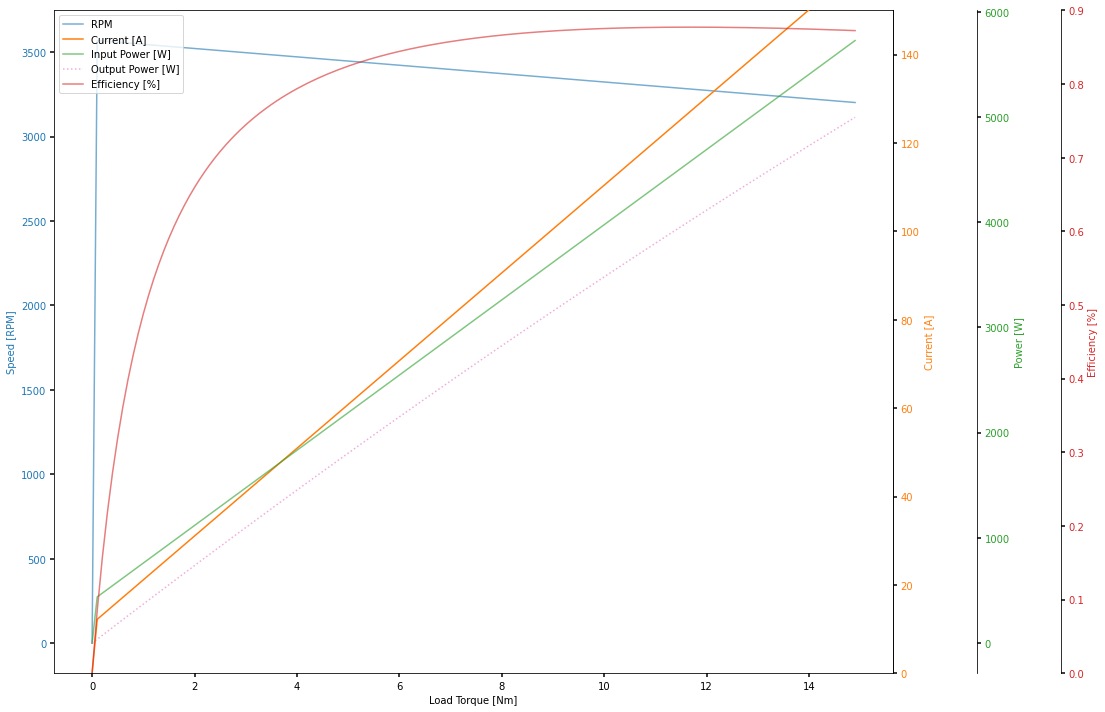

In [31]:
#ref: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

        
fig, ax1 = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.75)

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines["right"].set_position(("axes", 1.00))
ax3.spines["right"].set_position(("axes", 1.1))
ax4.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(ax2)
make_patch_spines_invisible(ax3)
make_patch_spines_invisible(ax4)
# Second, show the right spine.
ax2.spines["right"].set_visible(True)
ax3.spines["right"].set_visible(True)
ax4.spines["right"].set_visible(True)

p1, = ax1.plot(T_M, RPM, color="tab:blue", linestyle='solid', label='RPM', alpha=0.6)
p2, = ax2.plot(T_M, I_A, color="tab:orange", linestyle='solid', label='Current [A]', alpha=1)
p3, = ax3.plot(T_M, P_E, color="tab:green", linestyle='solid', label='Input Power [W]', alpha=0.6)
p3b, = ax3.plot(T_M, P_M, color="tab:pink", linestyle='dotted', label='Output Power [W]', alpha=0.6)
p4, = ax4.plot(T_M, Eff, color="tab:red", linestyle='solid', label='Efficiency [%]', alpha=0.6)
# tab:olive, tab:cyan, tab:gray, tab:purple, tab:brown

# ax1.set_xlim(...)
# ax1.set_ylim(...)
ax2.set_ylim([0,150])
# ax3.set_ylim(...)
ax4.set_ylim([0,0.9])

ax1.set_xlabel('Load Torque [Nm]')
ax1.set_ylabel('Speed [RPM]')
ax2.set_ylabel('Current [A]')
ax3.set_ylabel('Power [W]')
ax4.set_ylabel('Efficiency [%]')

ax1.yaxis.label.set_color(p1.get_color())
ax2.yaxis.label.set_color(p2.get_color())
ax3.yaxis.label.set_color(p3.get_color())
ax4.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)

ax1.tick_params(axis='y', labelcolor=p1.get_color(), **tkw)
ax2.tick_params(axis='y', labelcolor=p2.get_color(), **tkw)
ax3.tick_params(axis='y', labelcolor=p3.get_color(), **tkw)
ax4.tick_params(axis='y', labelcolor=p4.get_color(), **tkw)
ax1.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p3b, p4]
ax1.legend(lines, [l.get_label() for l in lines], loc=2)

plt.tight_layout()
plt.show()

# Obtendo os dados do fabricante

Para que seja possível realizarmos uma otimização, primeiro é necessário obter os dados das curvas de perfomrance disponibilizadas pelo fabricante.

O Motor **ME0909** é produzido pela **Motenergy**, e embora ele possua um site, disponibiliza apenas os desenhos do motor, não as curvas de performance. Felizmente os distribuidores e vendedores disponibilizam, sendo encontrado na forma vetorizada (maior qualidade) no [evdrives](http://www.evdrives.com/content/Motors/ME0909/ME0909_Performance_Data.pdf).

Para extrair os dados dessas curvas existem softwares especializados, inclusive em python, um excelente tutorial pode ser encontrado em [matthewkudija.com](https://matthewkudija.com/blog/2018/05/05/digitize-graph/) e [towardsdatascience.com](https://towardsdatascience.com/extracting-digitising-data-from-plots-in-scientific-papers-or-images-6e098cb887aa). Aqui foi utilizado o [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer) e os dados foram exportados como um arquivo _.csv_ para cada curva extraída (salvos [aqui](data/datasheet/raw)), portanto, precisamos abrir todos esses dados e linearizá-los para uma mesma escala no eixo X (torque na unidade $lb\,in$). O projeto do WebPlotDigitizer foi salvo no arquivo [me0909.json](data/datasheet/project/me0909.json), que pode ser importado no WebPlotDigitizer caso necessário realizar ajustes ou re-exportar os dados.

Para trabalhar com os arquivos, podemos acessar todos os arquivos de uma pasta do sistema de arquivos usando a biblioteca _glob_:

In [32]:
import glob
raw_csv_files = sorted(glob.glob("data/datasheet/raw/*.csv"))
for raw_filename in raw_csv_files: print(raw_filename)

data/datasheet/raw/24V CCW Amps.csv
data/datasheet/raw/24V CCW Eff.csv
data/datasheet/raw/24V CCW RPM.csv
data/datasheet/raw/24V CCW Volts.csv
data/datasheet/raw/24V CCW Watts Out.csv
data/datasheet/raw/24V CW Amps.csv
data/datasheet/raw/24V CW Eff.csv
data/datasheet/raw/24V CW RPM.csv
data/datasheet/raw/24V CW Volts.csv
data/datasheet/raw/24V CW Watts Out.csv
data/datasheet/raw/36V CCW Amps.csv
data/datasheet/raw/36V CCW Eff.csv
data/datasheet/raw/36V CCW RPM.csv
data/datasheet/raw/36V CCW Volts.csv
data/datasheet/raw/36V CCW Watts Out.csv
data/datasheet/raw/36V CW Amps.csv
data/datasheet/raw/36V CW Eff.csv
data/datasheet/raw/36V CW RPM.csv
data/datasheet/raw/36V CW Volts.csv
data/datasheet/raw/36V CW Watts Out.csv
data/datasheet/raw/48V CCW Amps.csv
data/datasheet/raw/48V CCW Eff.csv
data/datasheet/raw/48V CCW RPM.csv
data/datasheet/raw/48V CCW Volts.csv
data/datasheet/raw/48V CCW Watts Out.csv
data/datasheet/raw/48V CW Amps.csv
data/datasheet/raw/48V CW Eff.csv
data/datasheet/raw/48

Para simplificar o trabalho no momento da extração, foi optado pela utilização de um único eixo Y unitário para todos os dados, então precisaremos escalonar os dados, simplesmente multiplicando pelo máximo de cada eixo, armazenado o arquivo [yscales.json](data/datasheet/project/yscales.json), que podemos abrir utilizando a biblioteca _json_, convertendo para um dicionário:

In [33]:
import json
yscales_dict = json.load(open('data/datasheet/project/yscales.json'))
print(yscales_dict)

{'48V': {'Eff': 1.0, 'Watts Out': 10000, 'Volts': 50, 'Amps': 200, 'RPM': 5000}, '36V': {'Eff': 1.0, 'Watts Out': 5000, 'Volts': 50, 'Amps': 200, 'RPM': 5000}, '24V': {'Eff': 1.0, 'Watts Out': 5000, 'Volts': 50, 'Amps': 200, 'RPM': 5000}}


Podemos usar a biblioteca _pandas_ para criar diversos _DataFrames_ (estruturas de dados análogas as páginas das planilhas _Excel_), cada um contendo uma das páginas das curvas de performance do fabricante.

Para que todos os dados estejam alinhados no mesmo ponto e sejam igualmente espaçados, usamos a biblioteca _Scipy_ para realizar uma interpolação linear nos dados.

In [34]:
import pandas as pd
import scipy as sp
from os.path import basename

dataset = {
    'CW': {'24V': {}, '36V': {}, '48V': {}},
    'CCW': {'24V': {}, '36V': {}, '48V': {}}
}
for raw_filename in raw_csv_files:
    # Get the curve information from the filename
    words = basename(raw_filename).split('.')[0].split(' ')
    voltage = words[0]
    direction = words[1]
    name = ' '.join(words[2:])
    
    lbin_to_nm = 0.11298482902761668
    
    # Read and interpolate/extrapolate to a common linear torque axis
    df = pd.read_csv(raw_filename, header=0, names=['x', 'y'])
    f = sp.interpolate.interp1d(
        df['x'], df['y'],
        kind='linear',
        fill_value="extrapolate",
        assume_sorted=False,
        copy=False
    )
    xnew = np.linspace(start=0, stop=15/lbin_to_nm, num=50)
    ynew = f(xnew)
    
    # Rescale torque to Nm and data to its own yscale
    xnew *= lbin_to_nm
    ynew *= yscales_dict[voltage][name]
    
    # Add to the dict:
    dataset[direction][voltage]['Torque'] = xnew
    dataset[direction][voltage][name] = ynew

# Rename columns
columns = { # old column name: new column name
    'Volts': 'V_A',
    'Amps': 'I_A',
    'Torque': 'T_M',
    'Watts Out': 'P_M',
    'RPM': 'RPM',
    'Eff': 'Eff'
}
df_CW_24V = pd.DataFrame(dataset['CW']['24V']).rename(columns=columns)
df_CCW_24V = pd.DataFrame(dataset['CCW']['24V']).rename(columns=columns)
df_CW_36V = pd.DataFrame(dataset['CW']['36V']).rename(columns=columns)
df_CCW_36V = pd.DataFrame(dataset['CCW']['36V']).rename(columns=columns)
df_CW_48V = pd.DataFrame(dataset['CW']['48V']).rename(columns=columns)
df_CCW_48V = pd.DataFrame(dataset['CCW']['48V']).rename(columns=columns)
del dataset

dfs = [df_CCW_24V, df_CW_36V, df_CCW_36V, df_CW_48V, df_CCW_48V]

# Compute input power
df_CW_24V['P_E'] = df_CW_24V['V_A'] * df_CW_24V['I_A']
df_CCW_24V['P_E'] = df_CCW_24V['V_A'] * df_CCW_24V['I_A']
df_CW_36V['P_E'] = df_CW_36V['V_A'] * df_CW_36V['I_A']
df_CCW_36V['P_E'] = df_CCW_36V['V_A'] * df_CCW_36V['I_A']
df_CW_48V['P_E'] = df_CW_48V['V_A'] * df_CW_48V['I_A']
df_CCW_48V['P_E'] = df_CCW_48V['V_A'] * df_CCW_48V['I_A']

display(df_CW_36V)

,T_M,I_A,Eff,RPM,V_A,P_M,P_E
0,0.000000,7.378116,-1.624595,3326.988756,35.837780,-32.209044,264.415299
1,0.306122,8.660227,0.119502,3326.988756,35.848708,77.791037,310.457932
2,0.612245,9.942337,0.532240,3326.988756,35.859636,187.791119,356.528586
3,0.918367,11.475444,0.710054,3321.413597,35.861901,290.365112,411.531227
4,1.224490,13.131947,0.834336,3313.101785,35.859465,401.060758,470.904601
5,1.530612,15.344635,0.881210,3285.241083,35.860179,515.256747,550.261352
6,1.836735,17.979693,0.900506,3278.011333,35.861040,619.083149,644.770496
7,2.142857,21.449769,0.906081,3272.802869,35.861967,724.723532,769.230904
8,2.448980,24.917298,0.911266,3266.192819,35.862870,823.245605,893.605825
9,2.755102,27.611590,0.916000,3258.227656,35.863838,926.107733,990.257586


In [35]:
df_CW_24V['Direction'] = 'CW'
df_CCW_24V['Direction'] = 'CCW'
df_CW_36V['Direction'] = 'CW'
df_CCW_36V['Direction'] = 'CCW'
df_CW_48V['Direction'] = 'CW'
df_CCW_48V['Direction'] = 'CCW'

df_CW_24V['Test'] = '24V'
df_CCW_24V['Test'] = '24V'
df_CW_36V['Test'] = '36V'
df_CCW_36V['Test'] = '36V'
df_CW_48V['Test'] = '48V'
df_CCW_48V['Test'] = '48V'

df = df_CW_24V.copy()
# df = df.append(df_CCW_24V)
df = df.append(df_CW_36V)
# df = df.append(df_CCW_36V)
df = df.append(df_CW_48V)
# df = df.append(df_CCW_48V)

df = df.set_index(['Direction', 'Test'])
display(df)

df = df.clip(lower=0)

T_M         I_A       Eff          RPM        V_A  \
Direction Test                                                            
CW        24V    0.000000    6.443637  0.023128  2209.722457  23.979559   
          24V    0.306122    8.298535  0.327033  2200.446277  23.974406   
          24V    0.612245   10.153433  0.532296  2191.170097  23.969252   
          24V    0.918367   11.618421  0.741711  2182.478415  23.969893   
          24V    1.224490   13.794902  0.810775  2173.419086  23.950926   
...                   ...         ...       ...          ...        ...   
          48V   13.775510  137.762281  0.847917  3905.556045  47.962743   
          48V   14.081633  141.950174  0.836532  3876.885036  47.962638   
          48V   14.387755  144.931979  0.837362  3867.308941  47.962638   
          48V   14.693878  147.420247  0.837472  3865.567117  47.955180   
          48V   15.000000  150.275740  0.835661  3852.169616  47.972175   

                        P_M          P_E  
Direction Test                            
CW        24V    -44.926370   154.515568  
          24V     39.688531   198.952439  
          24V    124.303432   243.370192  
          24V    205.135521   278.492302  
          24V    264.867699   330.400678  
...                     ...          ...  
          48V   5639.034372  6607.456858  
          48V   5732.938082  6808.304862  
          48V   5841.932778  6951.320071  
          48V   5955.681341  7069.564501  
          48V   6058.759692  7209.054047  

[150 rows x 7 columns]

Podemos refatorar o código para plotagem da curva de performance, transformando-a numa função que recebe um _dataframe_ como argumento e plotar todas as curvas de performance em sequência.

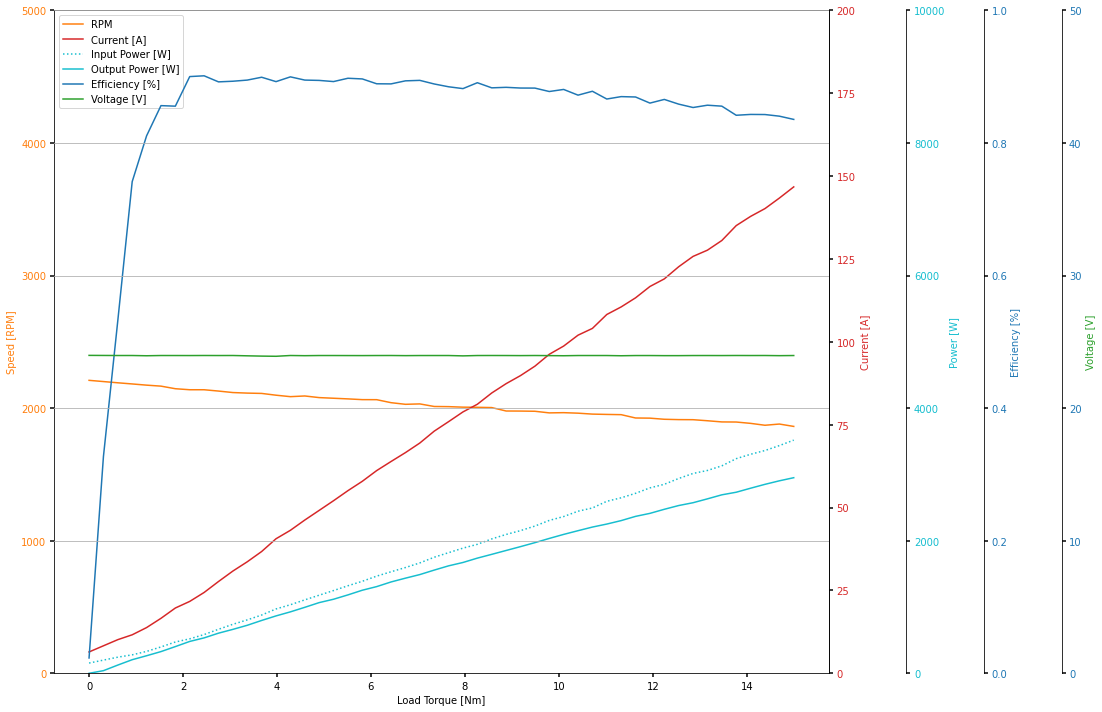

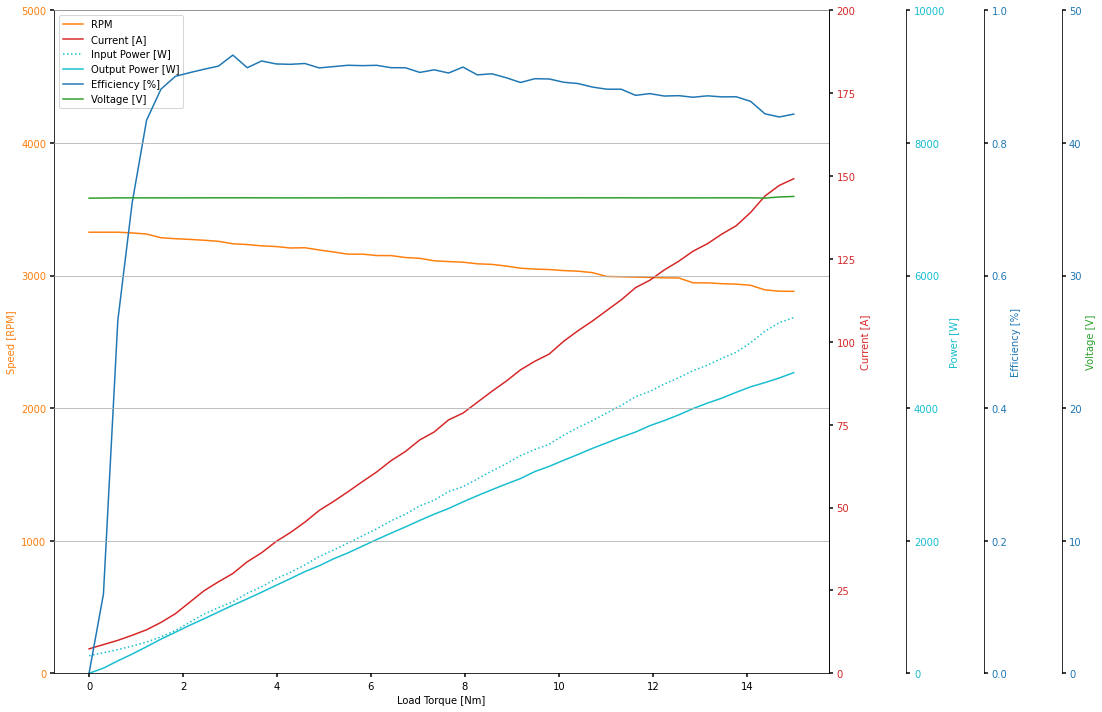

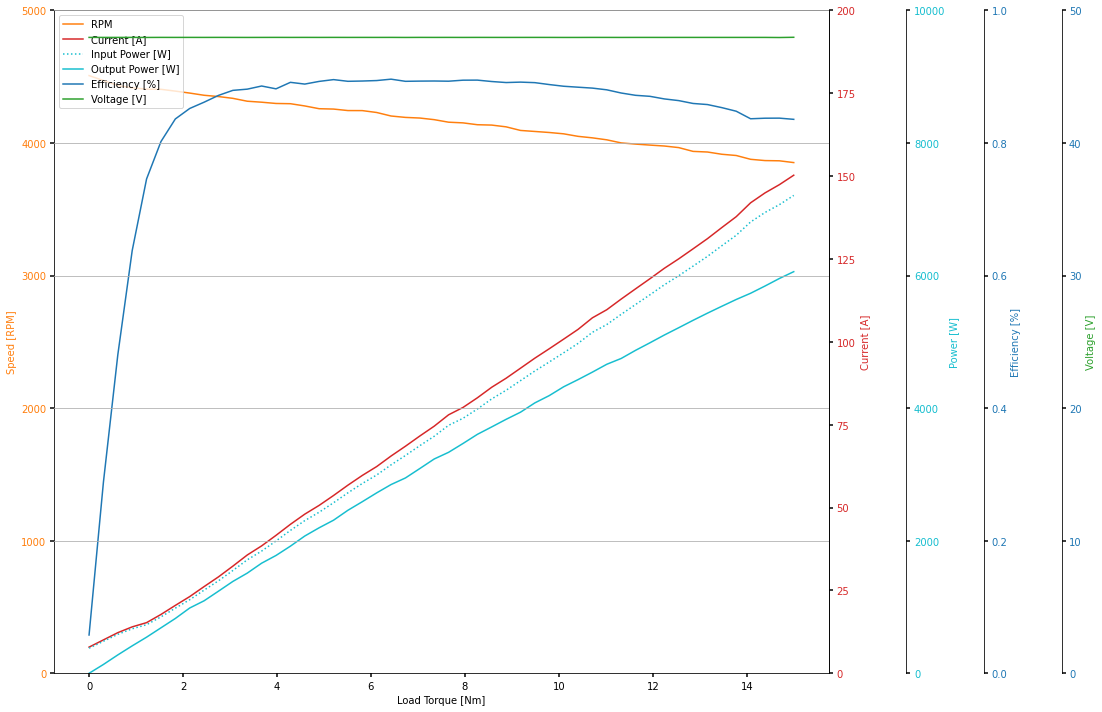

In [36]:
import matplotlib.pyplot as plt

def plot_performance_graph(df: pd.DataFrame):
    """
    Plot performance graph for motors
    The dataframe should have the following columns: 
        - T_M in nM
        - I_A in Amps
        - V_A in Volts
        - RPM in RPM
        - P_E in Watts
        - P_M in Watts
        - Eff from 0 to 1
    """

    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)


    fig, ax1 = plt.subplots(figsize=(15,10))
    fig.subplots_adjust(right=0.75)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax4 = ax1.twinx()
    ax5 = ax1.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    ax2.spines["right"].set_position(("axes", 1.00))
    ax3.spines["right"].set_position(("axes", 1.1))
    ax4.spines["right"].set_position(("axes", 1.2))
    ax5.spines["right"].set_position(("axes", 1.3))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(ax2)
    make_patch_spines_invisible(ax3)
    make_patch_spines_invisible(ax4)
    make_patch_spines_invisible(ax5)
    # Second, show the right spine.
    ax2.spines["right"].set_visible(True)
    ax3.spines["right"].set_visible(True)
    ax4.spines["right"].set_visible(True)
    ax5.spines["right"].set_visible(True)

    p1, = ax1.plot(df['T_M'], df['RPM'], color="tab:orange", linestyle='solid', label='RPM', alpha=1)
    p2, = ax2.plot(df['T_M'], df['I_A'], color="tab:red", linestyle='solid', label='Current [A]', alpha=1)
    p3, = ax3.plot(df['T_M'], df['P_E'], color="tab:cyan", linestyle='dotted', label='Input Power [W]', alpha=1)
    p3b, = ax3.plot(df['T_M'], df['P_M'], color="tab:cyan", linestyle='solid', label='Output Power [W]', alpha=1)
    p4, = ax4.plot(df['T_M'], df['Eff'], color="tab:blue", linestyle='solid', label='Efficiency [%]', alpha=1)
    p5, = ax5.plot(df['T_M'], df['V_A'], color="tab:green", linestyle='solid', label='Voltage [V]', alpha=1)
    # tab:olive, tab:gray, tab:purple, tab:brown

#     ax1.set_xlim(...)
    ax1.set_ylim([0, 5000])
    ax2.set_ylim([0, 200])
    ax3.set_ylim([0, 10000])
    ax4.set_ylim([0, 1])
    ax5.set_ylim([0, 50])

    ax1.set_xlabel('Load Torque [Nm]')
    ax1.set_ylabel('Speed [RPM]')
    ax2.set_ylabel('Current [A]')
    ax3.set_ylabel('Power [W]')
    ax4.set_ylabel('Efficiency [%]')
    ax5.set_ylabel('Voltage [V]')

    ax1.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())
    ax3.yaxis.label.set_color(p3.get_color())
    ax4.yaxis.label.set_color(p4.get_color())
    ax5.yaxis.label.set_color(p5.get_color())

    tkw = dict(size=4, width=1.5)

    ax1.tick_params(axis='y', labelcolor=p1.get_color(), **tkw)
    ax2.tick_params(axis='y', labelcolor=p2.get_color(), **tkw)
    ax3.tick_params(axis='y', labelcolor=p3.get_color(), **tkw)
    ax4.tick_params(axis='y', labelcolor=p4.get_color(), **tkw)
    ax5.tick_params(axis='y', labelcolor=p4.get_color(), **tkw)
    ax1.tick_params(axis='x', **tkw)

    lines = [p1, p2, p3, p3b, p4, p5]
    ax1.legend(lines, [l.get_label() for l in lines], loc=2)

    plt.tight_layout()
    plt.grid()
    plt.show()

for (direction,test) in df.index.unique():
    plot_performance_graph(df.loc[[(direction, test)]])
    

Com estes dados podemos, por exemplo, plotar a eficiência do motor em diferentes condições:

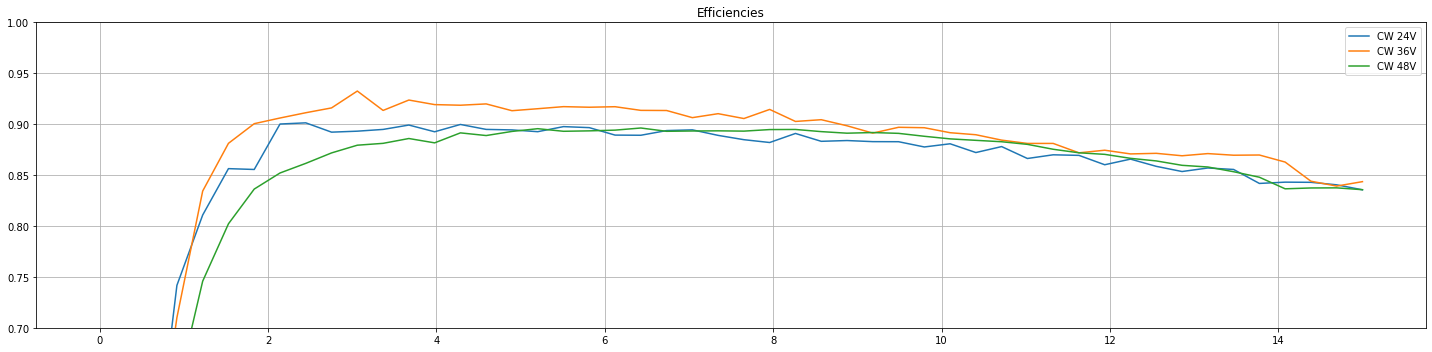

In [37]:
plt.figure(figsize=(20,5))
plt.title('Efficiencies')

for (direction,test) in df.index.unique():
    df_ = df.loc[[(direction, test)]]
    plt.plot(df_['T_M'], df_['Eff'], label=f'{direction} {test}')

plt.legend()
plt.ylim([0.7, 1])
plt.grid()
plt.tight_layout()
plt.show()

# Otimização

A otimização aqui entende-se pela aplicação do Método dos Mínimos Quadrados (Least Squares) para encontrar o melhor ajuste entre os dados e os parâmetros do modelo.

Em Python existem diversas bibliotecas para programação linear com excelentes documentações, como _SciPy_, _PyOpt_, _ORTools_, _lmfit_, _PuLP_, _Pyomo_, _docplex_, _gurobiby_, _CVXOPT_, e diversas delas são wrappers/bindings de bibliotecas largamente utilizadas em outras linguagens de programação.

Aqui, por simplicidade, utilizaremos a biblioteca [lmfit](https://lmfit.github.io/lmfit-py) que é um wrapper do _scipy.optimize_, específica para curve-fitting, o que se encaixa bem com o nosso tipo de problema.

Para começar, definimos nossa função de minimização _func_, e um wrapper que realiza a simulação no espaço de estados usando a biblioteca _control_, utilizando a modelagem definida anteriormente.

In [51]:
import lmfit

rps_to_rpm = 60 / (2 * np.pi)

def ss_motor(r, l, b, j, kt, kv) -> control.StateSpace:
    params = {
        R_A: r,
        L_A: l,
        B_M: b,
        J_M: j,
        K_T: kt,
        K_V: kv,
    }
    
    return control.ss(
        A.subs(params),
        B.subs(params),
        C.subs(params),
        D.subs(params)
    )


def simulate_motor(ss, df_in) -> np.array:
    df_out = pd.DataFrame().reindex_like(df_in)
    for (direction,test) in df_in.index.unique():
        t = np.linspace(
            start=0,
            stop=600*len(df_in.loc[[(direction, test)]]),
            num=len(df_in.loc[[(direction, test)]]),
            endpoint=False,
        )
        U = np.array([
            df_in.loc[[(direction, test)]]['T_M'],
            df_in.loc[[(direction, test)]]['V_A']
        ])
        _, yout, xout = control.forced_response(ss, t, U)

        df_tmp = pd.DataFrame()
        df_tmp['RPM'] = xout[0]
        df_tmp['I_A'] = xout[1]
        df_tmp['T_M'] = U[0]
        df_tmp['V_A'] = U[1]
        df_tmp['P_M'] = df_tmp['T_M'] * df_tmp['RPM']
        df_tmp['P_E'] = df_tmp['V_A'] * df_tmp['I_A']
        df_tmp['Eff'] = df_tmp['P_M'] / df_tmp['P_E']
        df_tmp['RPM'] *= rps_to_rpm
        df_tmp['Direction'] = direction
        df_tmp['Test'] = test
        
        df_tmp = df_tmp.fillna(0)
        df_tmp = df_tmp.set_index(['Direction', 'Test'])
        
        df_out = df_out.append(df_tmp)

    return df_out.dropna().clip(lower=0)
    

def func(df, R_A, L_A, B_M, J_M, K_T, K_V) -> np.array:
    ss = ss_motor(R_A, L_A, B_M, J_M, K_T, K_V)
    U = np.array([
        df['T_M'], df['V_A']
    ])
    df = simulate_motor(ss, df)
    data = np.array([df['RPM'], df['I_A'], df['P_E'], df['P_M'], df['Eff']])
    return data


def model_fit(model, params, method, df):
    data = np.array([df['RPM'], df['I_A'], df['P_E'], df['P_M'], df['Eff']])
    return model.fit(
        data=data,
        params=params,
        method=method,
        df=df,
    )


def model_eval(model_or_result, df):
    data = np.array([df['RPM'], df['I_A'], df['P_E'], df['P_M'], df['Eff']])
    yout = model_or_result.eval(df=df)
    df = pd.DataFrame()
    df['RPM'] = yout[0]
    df['I_A'] = yout[1]
    df['P_E'] = yout[2]
    df['P_M'] = yout[3]
    df['Eff'] = yout[4]
    return df


def plot_efficiency(result, df):
    fig, ax = plt.subplots(nrows=1, ncols=len(df.index.unique()), figsize=(15,3), sharey=True, sharex=True)
    for i, (direction,test) in enumerate(df.index.unique()):
        df_data = df.loc[[(direction, test)]]
        df_model = model_eval(result, df_data)

        ax[i].plot(df_data['T_M'], df_data['Eff'], label='data')
        ax[i].plot(df_data['T_M'], df_model['Eff'], linestyle='dashed', label='model')
        ax[i].set_title(f'{direction} {test}')
        ax[i].legend()
    plt.tight_layout()
    plt.show()


model = lmfit.Model(
    func=func,
    independent_vars=['df'],
    param_names=['R_A', 'L_A', 'B_M', 'J_M', 'K_T', 'K_V'],
)

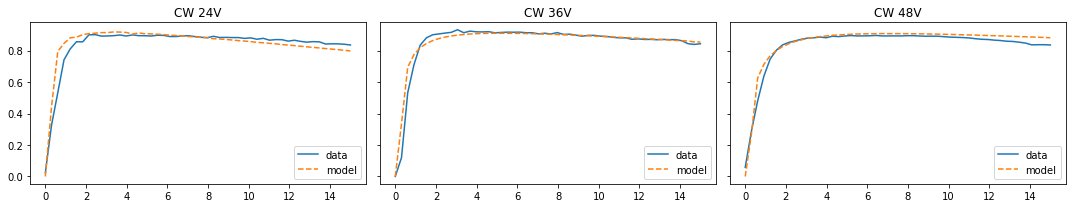

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 2540
    # data points      = 750
    # variables        = 4
    chi-square         = 37634275.6
    reduced chi-square = 50448.0906
    Akaike info crit   = 8125.51443
    Bayesian info crit = 8143.99472
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    R_A:  0.03217869 (init = 0.035)
    L_A:  2.8e-05 (fixed)
    B_M:  8.9560e-04 (init = 1e-06)
    J_M:  34.4225647 (init = 1e-06)
    K_T:  0.10361811 (init = 0.1)
    K_V:  0.10361811 == 'K_T'


In [55]:
params = lmfit.Parameters()
params.add_many(
    # NAME, VALUE, VARY, MIN,  MAX,  EXPR, BRUTE_STEP
    ('R_A', 35e-3, True, 1e-6, 1e0, None, None),
    ('L_A', 28e-6, False, 1e-9, 1e-3, None, None),
    ('B_M', 1e-6, True, 1e-9, 1e3, None, None),
    ('J_M', 1e-6, True, 1e-9, 1e3, None, None),
    ('K_T', 1e-1, True, 1e-2, 5e-1, None, None),
    ('K_V', 1e-1, True, 1e-2, 5e-1, "K_T", None),
)

# method = 'leastsq'
# method = 'least_squares'
# method = 'lbfgsb'
# method = 'bfgs'
# method = 'nelder'
# method = 'cobyla'
# method = 'powell'
# method = 'trust-constr'
# method = 'trust-exact'
# method = 'slsqp'

# global:
method = 'differential_evolution'
# method = 'basinhopping'
# method = 'dual_annealing'
# method = 'shgo'
result = model_fit(model, params, method, df)
plot_efficiency(result, df)
print(result.fit_report())